# Library needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Excel file needed
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
heart_df = pd.read_csv('heart_train.csv')

In [3]:
heart_df.describe(include= 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Attribute Information  
- Age: age of the patient [years]  
- Sex: sex of the patient [M: Male, F: Female]  
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
- RestingBP: resting blood pressure [mm Hg]  
- Cholesterol: serum cholesterol [mm/dl]  
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]  
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]  
- Oldpeak: oldpeak = ST [Numeric value measured in depression]  
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
- HeartDisease: output class [1: heart disease, 0: Normal]  

# Clean Dataset

In [5]:
# Create a copy of the Dataset
Heart_df_clean = heart_df.copy()

# Rename "#" to "ID" of Pokemon
Heart_df_clean.rename(columns = {'#': 'ID'}, inplace = True)

# Convert all Variable Names to UPPERCASE
Heart_df_clean.columns = Heart_df_clean.columns.str.upper()

# Remove all spaces and dots from Variable Names
Heart_df_clean.columns = Heart_df_clean.columns.str.replace(".","")
Heart_df_clean.columns = Heart_df_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
Heart_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             918 non-null    int64  
 1   SEX             918 non-null    object 
 2   CHESTPAINTYPE   918 non-null    object 
 3   RESTINGBP       918 non-null    int64  
 4   CHOLESTEROL     918 non-null    int64  
 5   FASTINGBS       918 non-null    int64  
 6   RESTINGECG      918 non-null    object 
 7   MAXHR           918 non-null    int64  
 8   EXERCISEANGINA  918 non-null    object 
 9   OLDPEAK         918 non-null    float64
 10  ST_SLOPE        918 non-null    object 
 11  HEARTDISEASE    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


C:\Users\LCP\AppData\Local\Temp\ipykernel_26908\1996328438.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Heart_df_clean.columns = Heart_df_clean.columns.str.replace(".","")


In [6]:
# Numeric
heart_AGE = pd.DataFrame(Heart_df_clean['AGE'])
heart_RBP = pd.DataFrame(Heart_df_clean['RESTINGBP'])
heart_CLS = pd.DataFrame(Heart_df_clean['CHOLESTEROL'])
heart_MAXHR = pd.DataFrame(Heart_df_clean['MAXHR'])
heart_HD = pd.DataFrame(Heart_df_clean['HEARTDISEASE'])

#catogrical
heart_SEX = pd.DataFrame(Heart_df_clean['SEX'])
heart_EA = pd.DataFrame(Heart_df_clean['EXERCISEANGINA'])
heart_CPT = pd.DataFrame(Heart_df_clean['CHESTPAINTYPE'])


# Reconfig type

In [7]:
heartC_HD = heart_HD
heartC_HD.replace(to_replace=[1,0],value = ['Y','N'],inplace = True )

In [8]:
heartC_HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HEARTDISEASE  918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


# Visualisation

<AxesSubplot:>

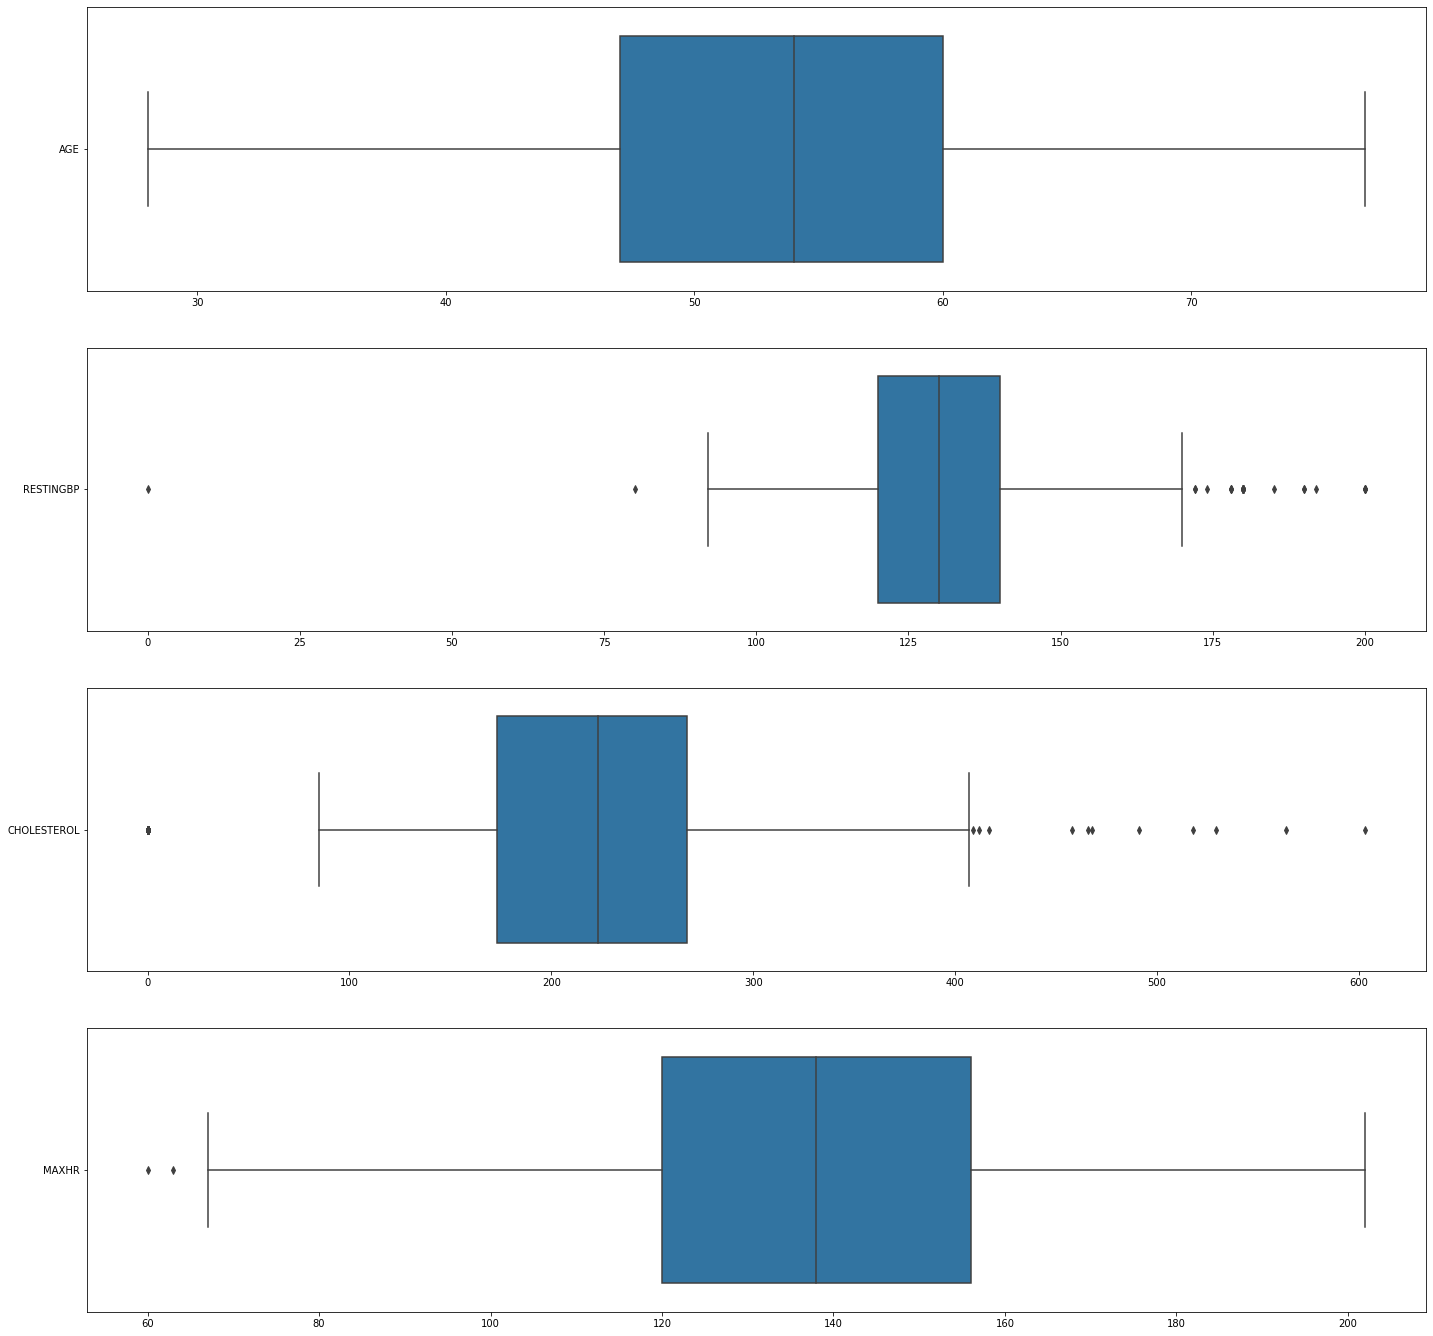

In [9]:
f1,ax1= plt.subplots(4,1,figsize =(24,24))
sb.boxplot(data = heart_AGE, orient ='h',ax=ax1[0])
sb.boxplot(data = heart_RBP, orient ='h',ax=ax1[1])
sb.boxplot(data = heart_CLS, orient ='h',ax=ax1[2])
sb.boxplot(data = heart_MAXHR, orient ='h',ax=ax1[3])


<AxesSubplot:xlabel='HEARTDISEASE', ylabel='count'>

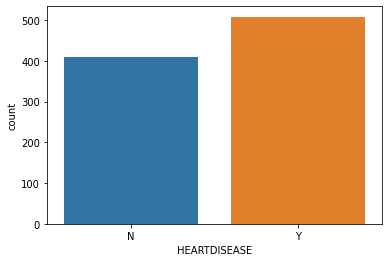

In [10]:
sb.countplot(x='HEARTDISEASE',data =heartC_HD,orient='h')

<AxesSubplot:xlabel='count', ylabel='SEX'>

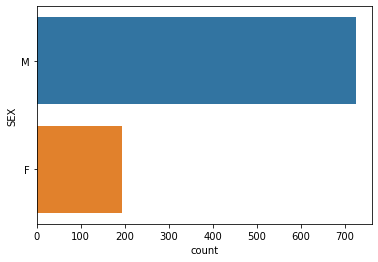

In [11]:
sb.countplot(y ='SEX',data = heart_SEX,orient ='v')

<AxesSubplot:xlabel='count', ylabel='EXERCISEANGINA'>

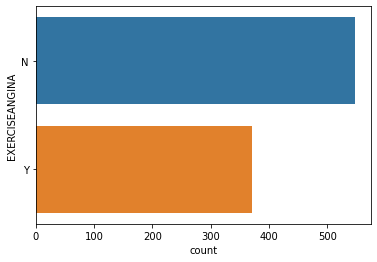

In [12]:
sb.countplot( y ='EXERCISEANGINA',data = heart_EA,orient='v')

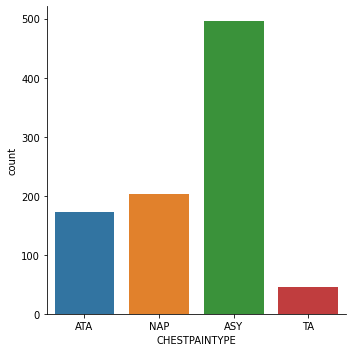

In [13]:
sb.catplot(x='CHESTPAINTYPE',data = heart_CPT,kind='count')

<AxesSubplot:>

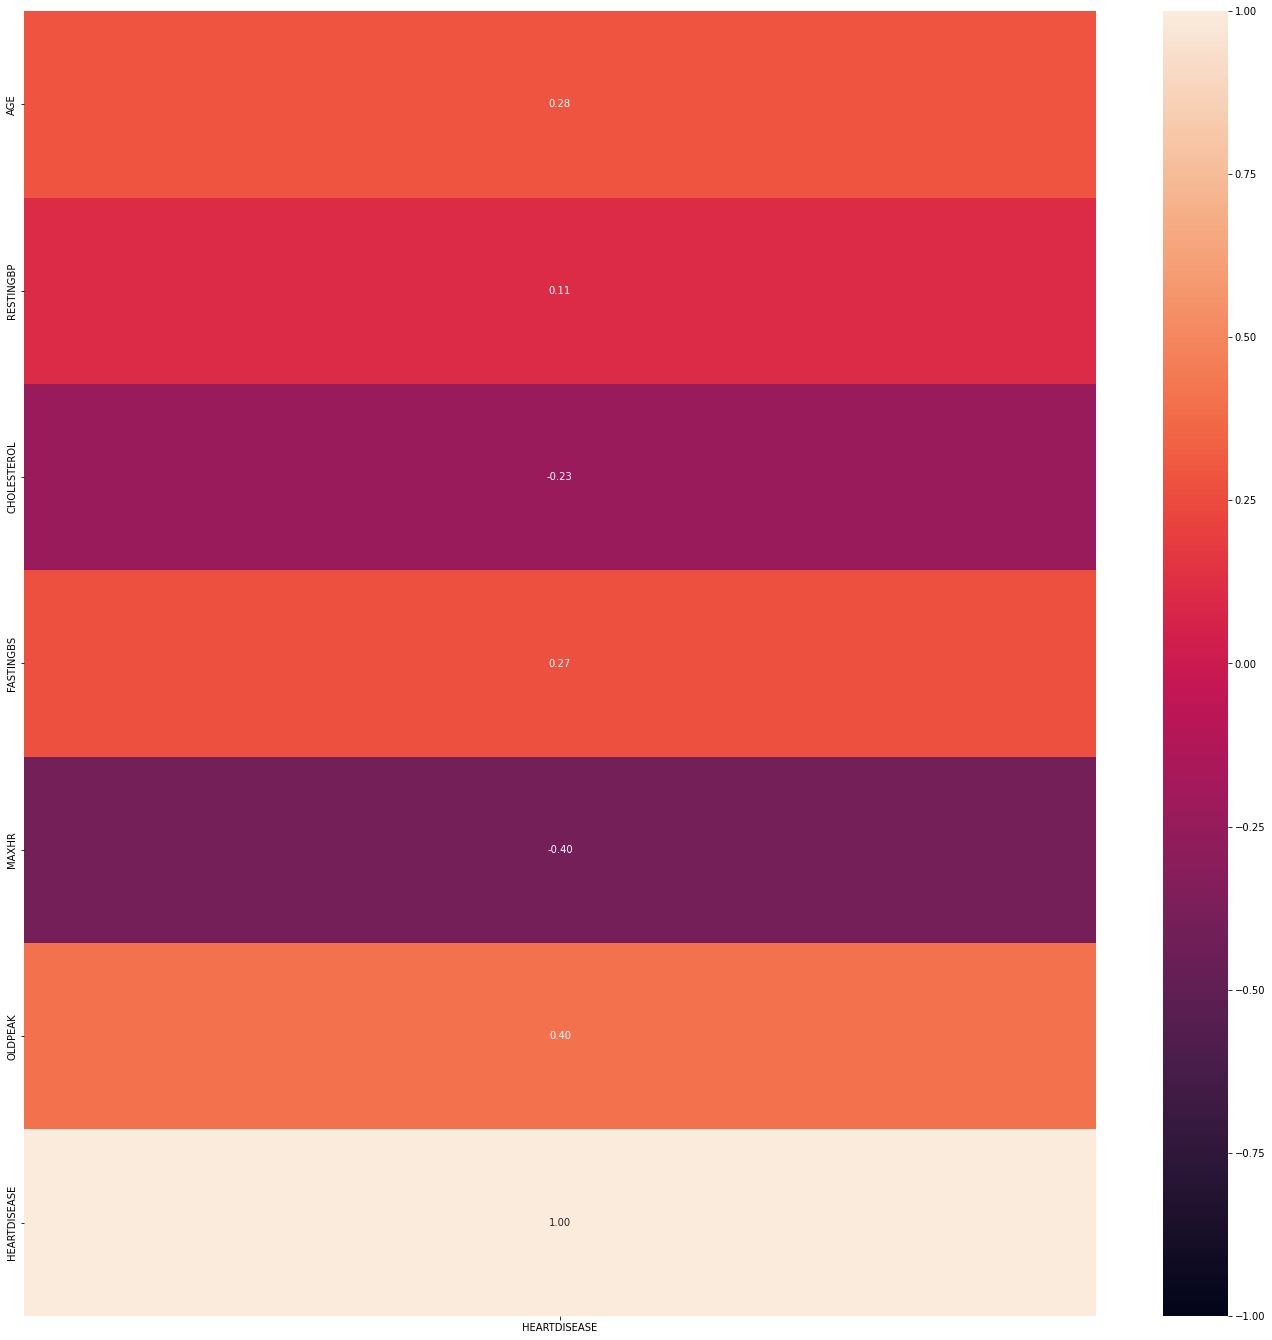

In [14]:
f3 = plt.figure(figsize =(24,24))
sb.heatmap(Heart_df_clean.corr()[['HEARTDISEASE']], vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [15]:
test1 = pd.concat([heartC_HD,heart_SEX],axis=1).reindex(heartC_HD.index)
test2 = pd.concat([heartC_HD,heart_EA],axis=1).reindex(heartC_HD.index)
test3 = pd.concat([heartC_HD,heart_CPT],axis=1).reindex(heartC_HD.index)

<AxesSubplot:xlabel='HEARTDISEASE', ylabel='count'>

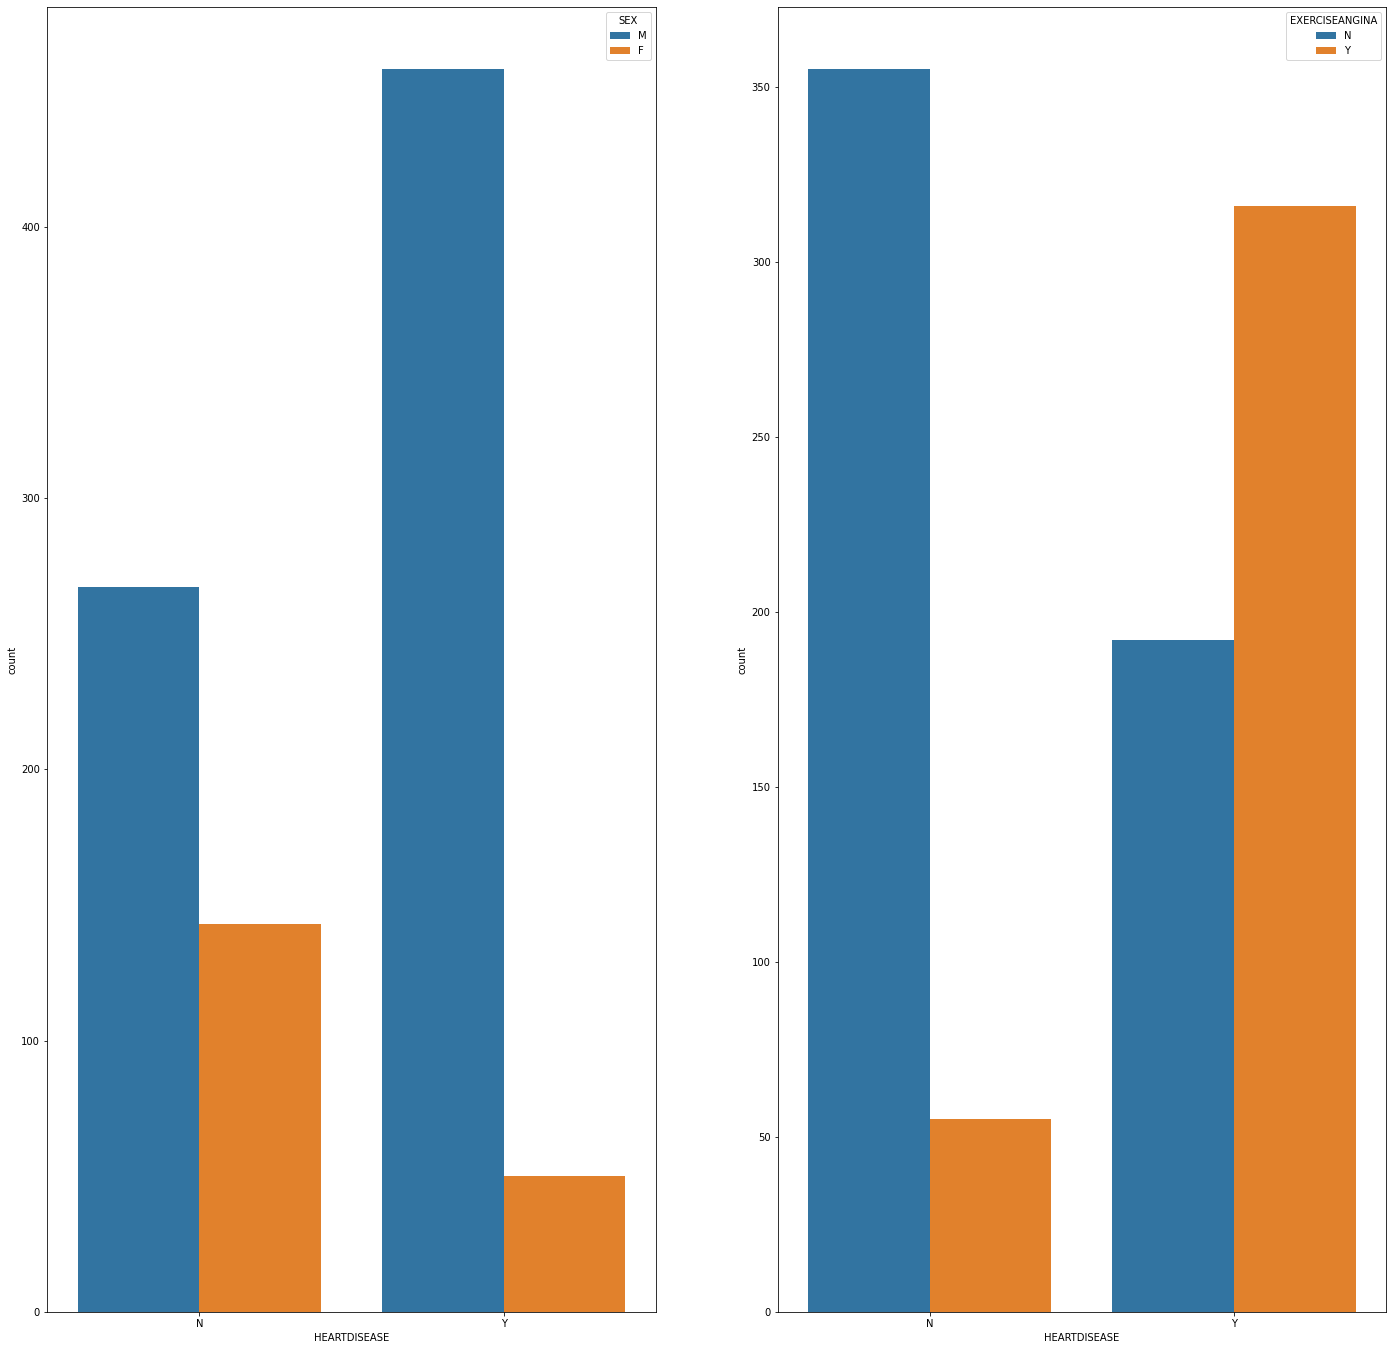

In [16]:
f4,ax2 =plt.subplots(1,2,figsize= (24,24))
sb.countplot(data =test1,x='HEARTDISEASE',hue='SEX',ax=ax2[0])
sb.countplot(data =test2,x='HEARTDISEASE',hue='EXERCISEANGINA',ax=ax2[1])

<AxesSubplot:xlabel='count', ylabel='CHESTPAINTYPE'>

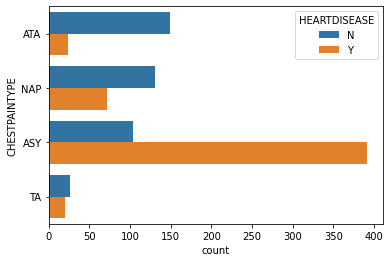

In [17]:
sb.countplot(data =test3,y='CHESTPAINTYPE',hue='HEARTDISEASE',orient='v')

# Machine Learning(model)

In [18]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#-------------[model1,2]----------------------
from sklearn.tree import DecisionTreeClassifier
#-------------[model3,4]----------------------
from sklearn.ensemble import RandomForestClassifier
#-------------[model5,6]------------------------
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

# Model 1 Decision Tree Classifier (uni-variable)

In [19]:
Age_train, Age_test, HD_train, HD_test = train_test_split(heart_AGE,heartC_HD, test_size = 0.3,random_state=42)

In [20]:
dectree1 = DecisionTreeClassifier(max_depth=2)
dectree1.fit(Age_train,HD_train)

DecisionTreeClassifier(max_depth=2)

[Text(334.8, 543.6, 'AGE <= 54.5\ngini = 0.497\nsamples = 642\nvalue = [298, 344]\nclass = N'),
 Text(167.4, 326.16, 'AGE <= 45.5\ngini = 0.471\nsamples = 332\nvalue = [206, 126]\nclass = Y'),
 Text(83.7, 108.72000000000003, 'gini = 0.405\nsamples = 138\nvalue = [99, 39]\nclass = Y'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.495\nsamples = 194\nvalue = [107, 87]\nclass = Y'),
 Text(502.20000000000005, 326.16, 'AGE <= 57.5\ngini = 0.417\nsamples = 310\nvalue = [92, 218]\nclass = N'),
 Text(418.5, 108.72000000000003, 'gini = 0.471\nsamples = 71\nvalue = [27, 44]\nclass = N'),
 Text(585.9, 108.72000000000003, 'gini = 0.396\nsamples = 239\nvalue = [65, 174]\nclass = N')]

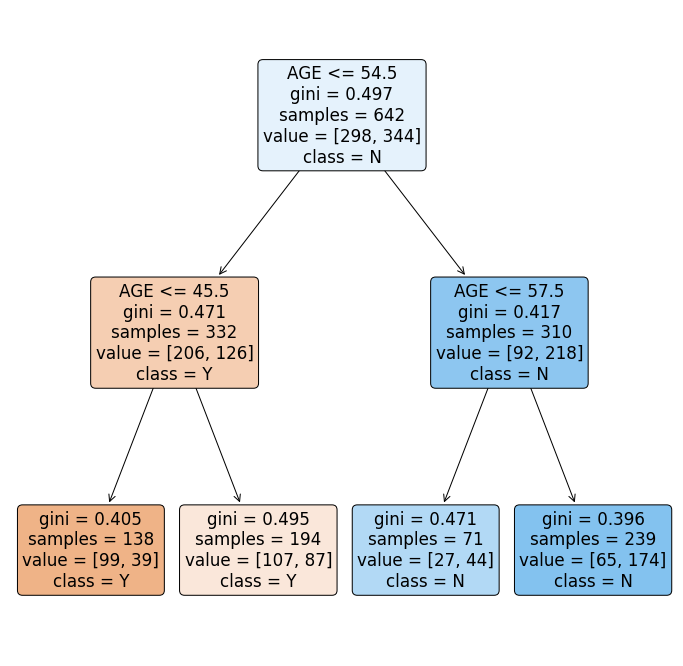

In [21]:
f5 = plt.figure(figsize=(12,12))
plot_tree(dectree1, filled=True, rounded=True, 
          feature_names=["AGE"], 
          class_names=["Y","N"])

Text(0.5, 1.0, 'Test Model 1')

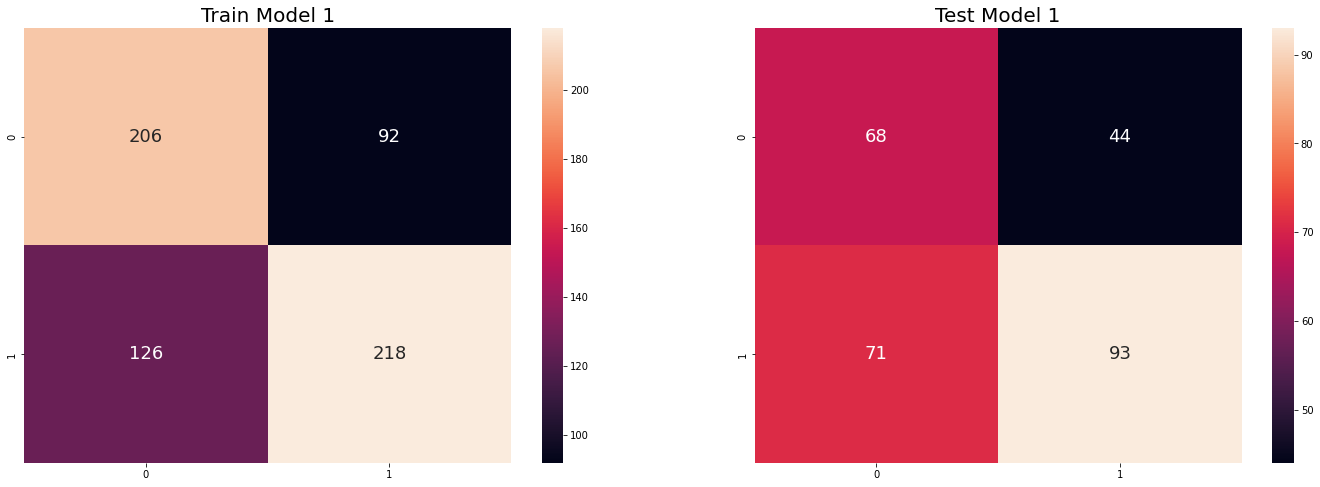

In [22]:
HD_train_pred = dectree1.predict(Age_train)
HD_test_pred = dectree1.predict(Age_test)
f6,ax3 = plt.subplots(1,2,figsize =(24,8))
sb.heatmap(confusion_matrix(HD_train, HD_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax3[0])
ax3[0].set_title("Train Model 1",fontsize = '20')
sb.heatmap(confusion_matrix(HD_test, HD_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax3[1])
ax3[1].set_title("Test Model 1",fontsize = '20')

# Goodness fit for Model 1

In [23]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree1.score(Age_train, HD_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(HD_train, HD_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree1.score(Age_test, HD_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(HD_test, HD_test_pred)
tptest = cmtest[1][1] # True Positives : Good (1) predicted Good (1)
fptest = cmtest[0][1] # False Positives : Bad (0) predicted Good (1)
tntest = cmtest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fntest = cmtest[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()
print("FPR Test :\t", (fptest/(tntest + fptest)))
print("FNR Test :\t", (fntest/(tptest + fntest)))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.660436137071651

TPR Train :	 0.6337209302325582
TNR Train :	 0.6912751677852349

FPR Train :	 0.3087248322147651
FNR Train :	 0.36627906976744184

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5833333333333334

TPR Test :	 0.5670731707317073
TNR Test :	 0.6071428571428571

FPR Test :	 0.39285714285714285
FNR Test :	 0.4329268292682927



# Model 2(increase of variable + increase of depth)

In [25]:
test64 = pd.DataFrame(Heart_df_clean[['AGE','CHOLESTEROL','MAXHR','RESTINGBP']])

In [26]:
test64_train, test64_test, HD_train,  HD_test = train_test_split(test64, heartC_HD, test_size = 0.3,random_state=42)

In [27]:
dectree2 = DecisionTreeClassifier(max_depth = 14)  # create the decision tree object
dectree2.fit(test64_train, HD_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=14)

In [28]:
# Predict Response corresponding to Predictors
HD_train_pred2 = dectree2.predict(test64_train)
HD_test_pred2 = dectree2.predict(test64_test)

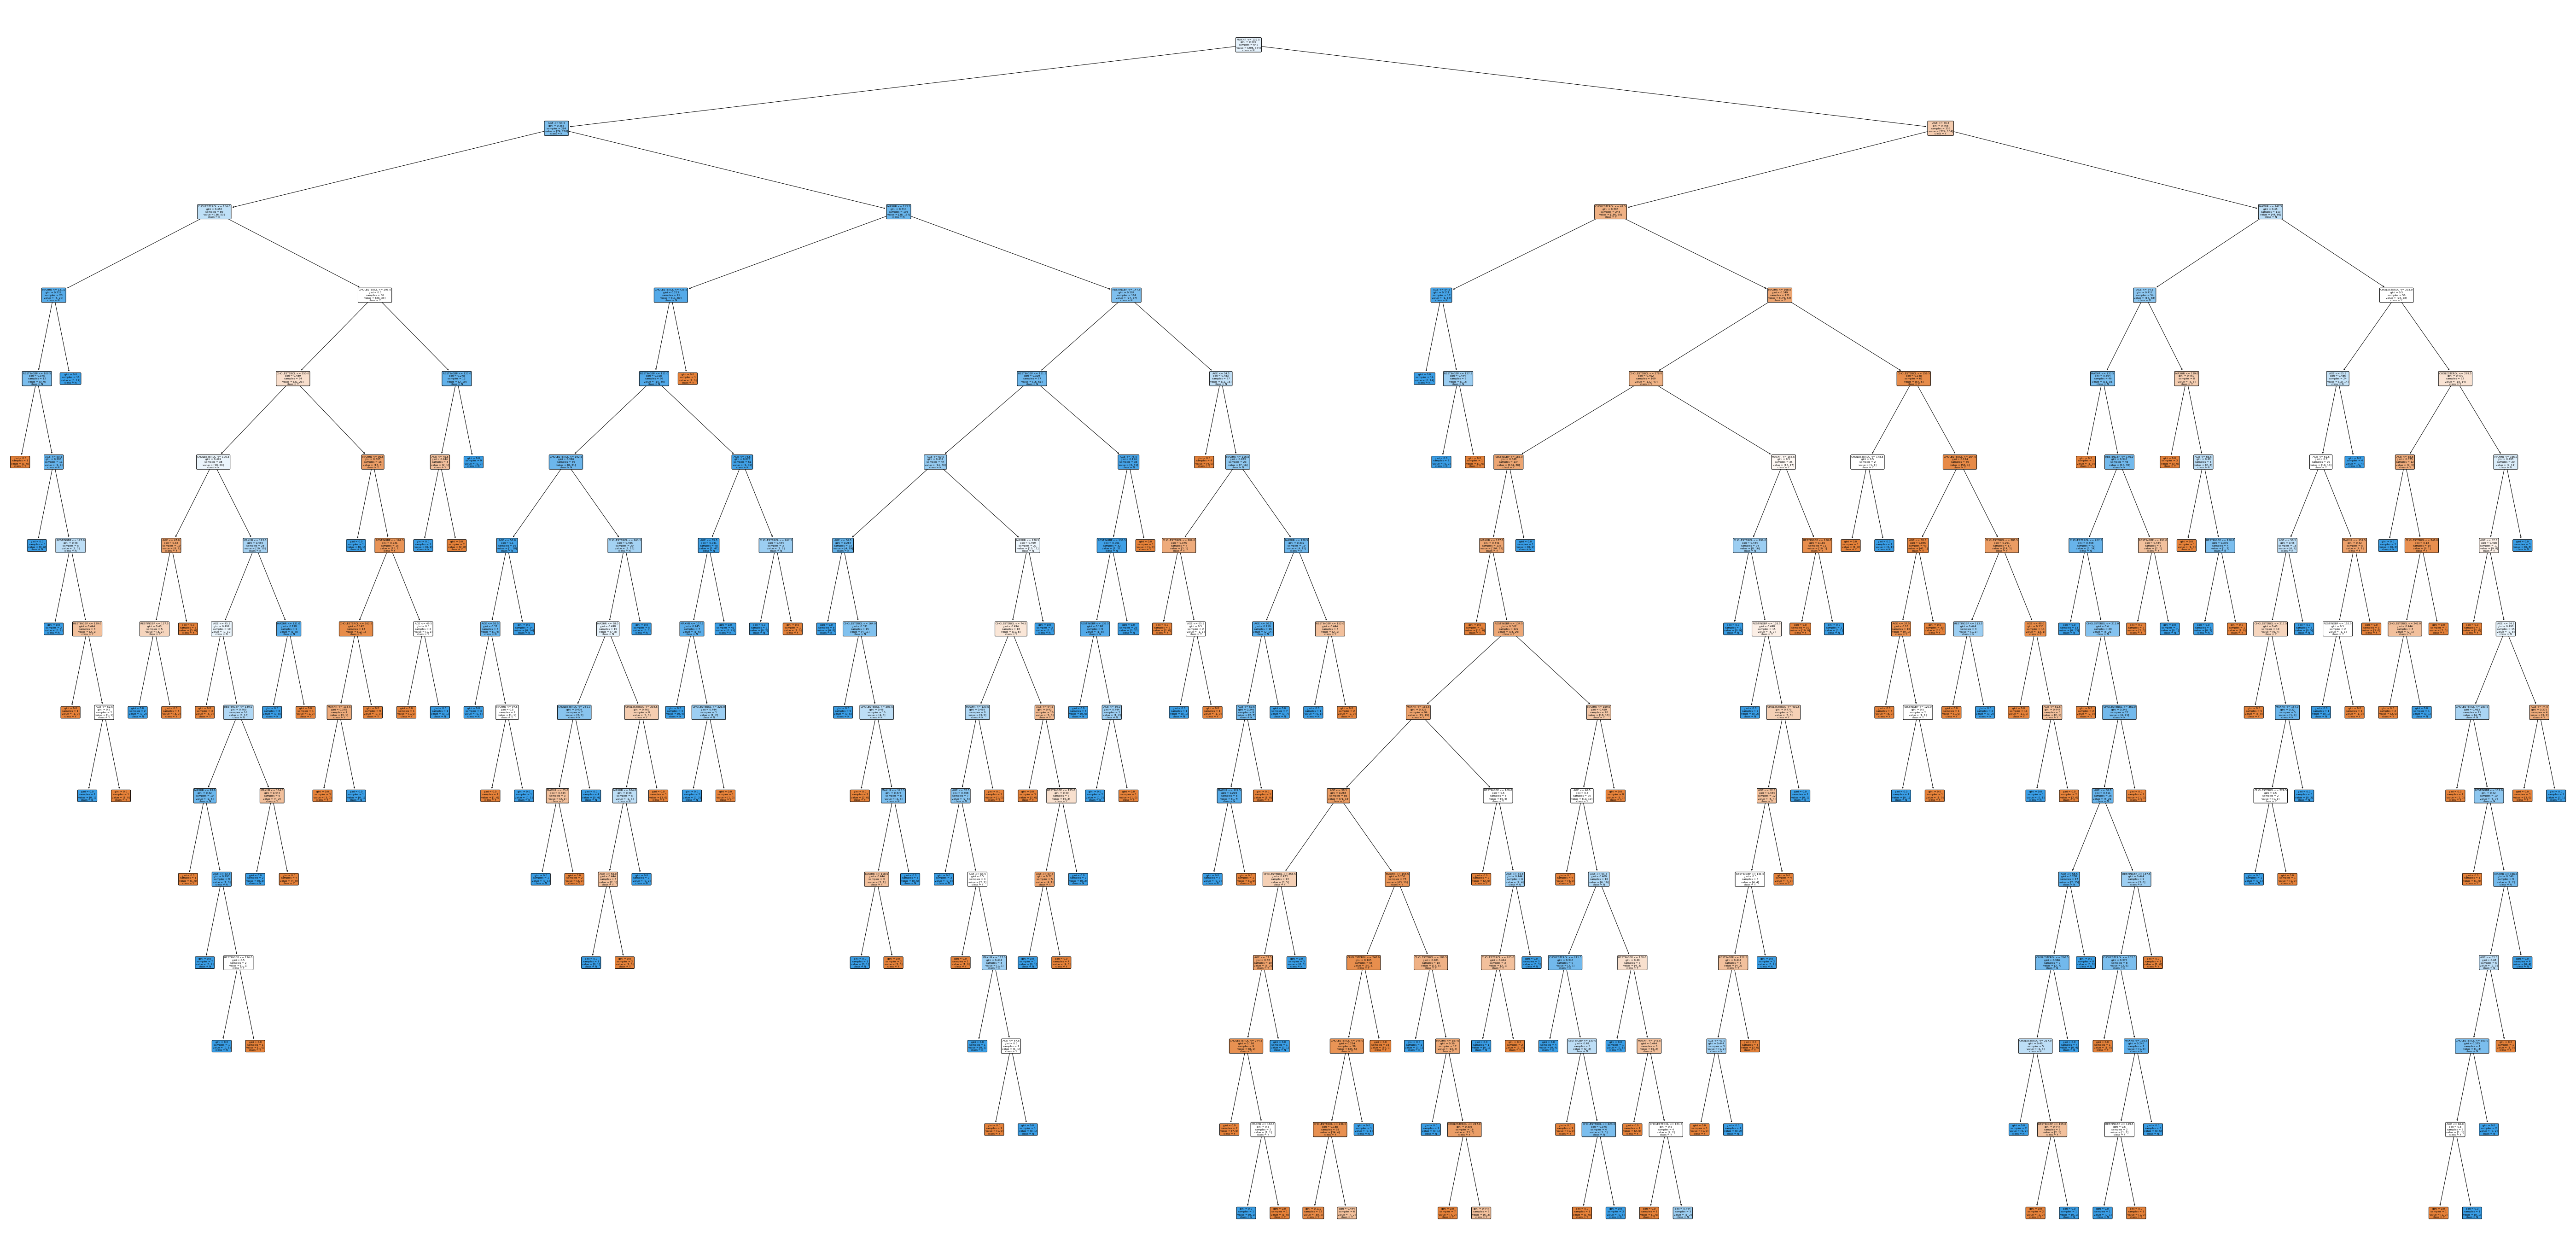

In [29]:
f7 = plt.figure(figsize=(100,50))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=test64_train.columns, 
          class_names=["Y","N"])
f7.savefig('model 2 tree graph.png')

# Goodness of fit for model 2

In [30]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(test64_train, HD_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(HD_train, HD_train_pred2)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()
print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(test64_test, HD_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest = confusion_matrix(HD_test, HD_test_pred2)
tptest = cmtest[1][1] # True Positives : Good (1) predicted Good (1)
fptest = cmtest[0][1] # False Positives : Bad (0) predicted Good (1)
tntest = cmtest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fntest = cmtest[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Test :\t", (tptest/(tptest + fntest)))
print("TNR Test :\t", (tntest/(tntest + fptest)))
print()
print("FPR Test :\t", (fptest/(tntest + fptest)))
print("FNR Test :\t", (fntest/(tptest + fntest)))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9875389408099688

TPR Train :	 0.9796511627906976
TNR Train :	 0.9966442953020134

FPR Train :	 0.003355704697986577
FNR Train :	 0.020348837209302327

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6557971014492754

TPR Test :	 0.6524390243902439
TNR Test :	 0.6607142857142857

FPR Test :	 0.3392857142857143
FNR Test :	 0.3475609756097561



Text(0.5, 1.0, 'Test Model 4')

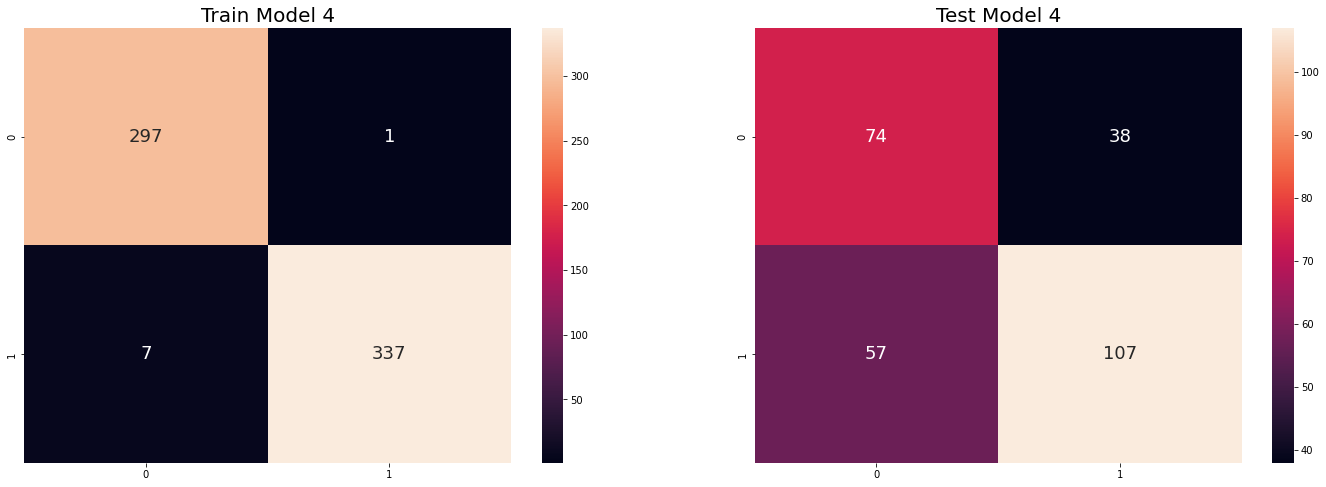

In [31]:
f8,ax4= plt.subplots(1,2,figsize =(24,8))
sb.heatmap(confusion_matrix(HD_train, HD_train_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax4[0])
ax4[0].set_title("Train Model 4",fontsize = '20')
sb.heatmap(confusion_matrix(HD_test, HD_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax4[1])
ax4[1].set_title("Test Model 4",fontsize = '20')

# Model 3 Random Forest (uni-variable)

In [32]:
Age3_train, Age3_test, HD3_train, HD3_test = train_test_split(heart_AGE,heartC_HD, test_size = 0.3,random_state=42)

In [33]:
dectree3 = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                  max_depth = 4)       # set the maximum depth of each tree

dectree3.fit(Age3_train,HD3_train)

HD_train_pred3 = dectree3.predict(Age3_train)
HD_test_pred3 = dectree3.predict(Age3_test)

C:\Users\LCP\AppData\Local\Temp\ipykernel_26908\1231960777.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dectree3.fit(Age3_train,HD3_train)


Text(0.5, 1.0, 'Test Model 2')

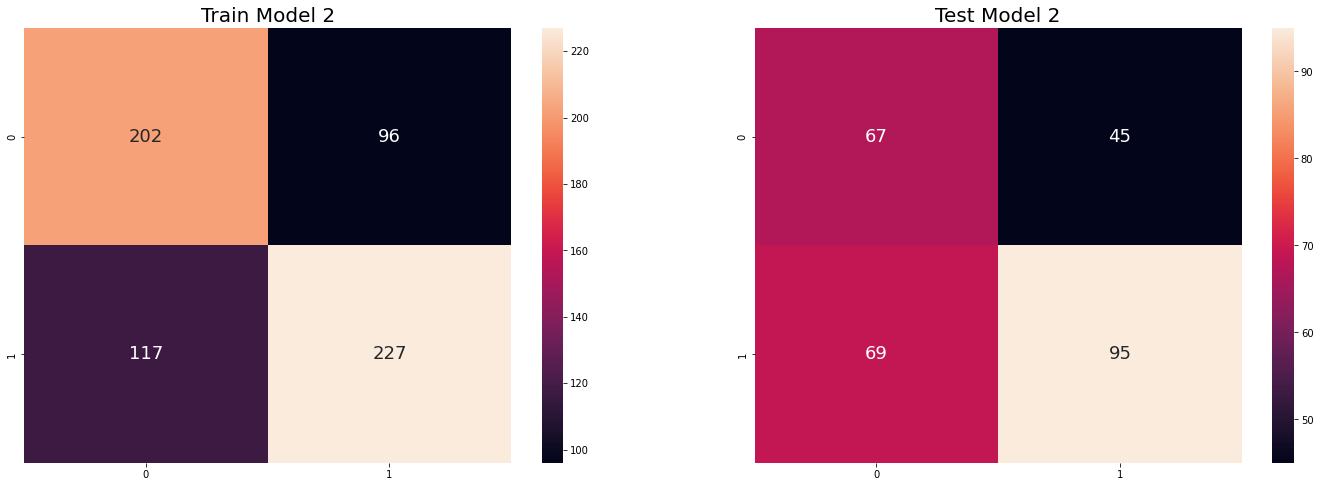

In [34]:
f9,ax5 = plt.subplots(1,2,figsize =(24,8))
sb.heatmap(confusion_matrix(HD3_train, HD_train_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax5[0])
ax5[0].set_title("Train Model 2",fontsize = '20')
sb.heatmap(confusion_matrix(HD3_test, HD_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax5[1])
ax5[1].set_title("Test Model 2",fontsize = '20')

# Goodness of fit for Model 3

In [35]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(Age3_train, HD3_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain3 = confusion_matrix(HD3_train, HD_train_pred3)
tpTrain3 = cmTrain3[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain3 = cmTrain3[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain3 = cmTrain3[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain3 = cmTrain3[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Train :\t", (tpTrain3/(tpTrain3 + fnTrain3)))
print("TNR Train :\t", (tnTrain3/(tnTrain3 + fpTrain3)))
print()
print("FPR Train :\t", (fpTrain3/(tnTrain3 + fpTrain3)))
print("FNR Train :\t", (fnTrain3/(tpTrain3 + fnTrain3)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(Age3_test, HD3_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest3 = confusion_matrix(HD3_test, HD_test_pred3)
tptest3 = cmtest3[1][1] # True Positives : Good (1) predicted Good (1)
fptest3 = cmtest3[0][1] # False Positives : Bad (0) predicted Good (1)
tntest3 = cmtest3[0][0] # True Negatives : Bad (0) predicted Bad (0)
fntest3 = cmtest3[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Test :\t", (tptest3/(tptest3 + fntest3)))
print("TNR Test :\t", (tntest3/(tntest3 + fptest3)))
print()
print("FPR Test :\t", (fptest3/(tntest3 + fptest3)))
print("FNR Test :\t", (fntest3/(tptest3 + fntest3)))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6682242990654206

TPR Train :	 0.6598837209302325
TNR Train :	 0.6778523489932886

FPR Train :	 0.3221476510067114
FNR Train :	 0.34011627906976744

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5869565217391305

TPR Test :	 0.5792682926829268
TNR Test :	 0.5982142857142857

FPR Test :	 0.4017857142857143
FNR Test :	 0.42073170731707316



In [36]:
# Model 4 (Mulitvariable)

In [37]:
X = pd.DataFrame(Heart_df_clean[['AGE','CHOLESTEROL','MAXHR','RESTINGBP']]) # Features
y = pd.DataFrame(Heart_df_clean['HEARTDISEASE']) # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [38]:
dectree4 = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                  max_depth = 4)       # set the maximum depth of each tree
dectree4.fit(X_train,y_train)

C:\Users\LCP\AppData\Local\Temp\ipykernel_26908\2654164371.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dectree4.fit(X_train,y_train)


RandomForestClassifier(max_depth=4)

Text(0.5, 1.0, 'Test Model 4')

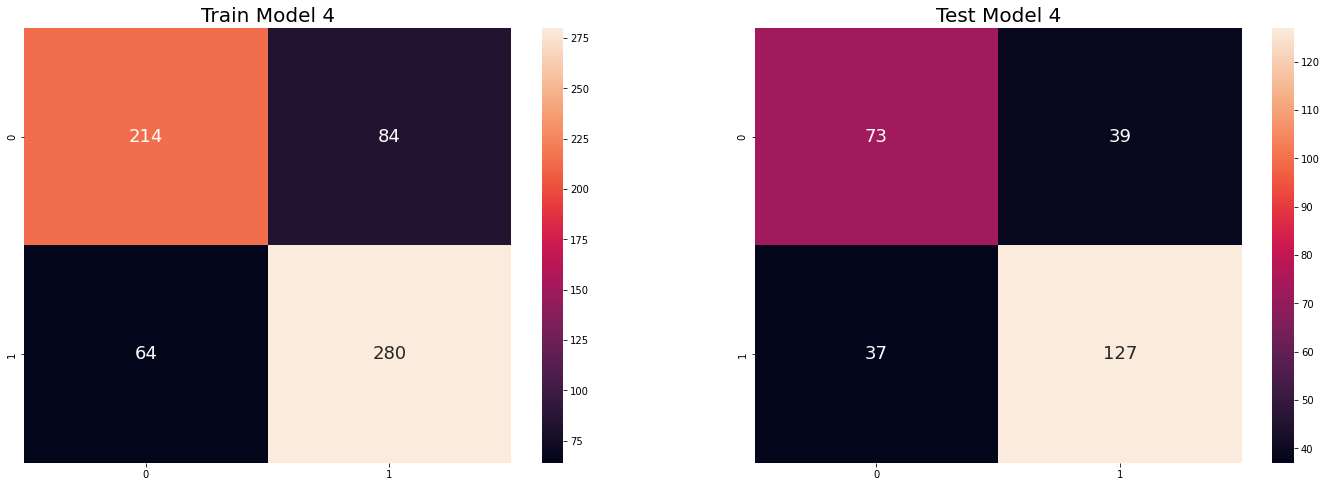

In [39]:
y_train_pred2 = dectree4.predict(X_train)
y_test_pred2 = dectree4.predict(X_test)
f10,ax6 = plt.subplots(1,2,figsize =(24,8))
sb.heatmap(confusion_matrix(y_train, y_train_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax6[0])
ax6[0].set_title("Train Model 4",fontsize = '20')
sb.heatmap(confusion_matrix(y_test, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax6[1])
ax6[1].set_title("Test Model 4",fontsize = '20')

# Goodness of Fit for model 4

In [40]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain4 = confusion_matrix(y_train, y_train_pred2)
tpTrain4 = cmTrain4[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain4 = cmTrain4[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain4 = cmTrain4[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain4 = cmTrain4[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Train :\t", (tpTrain4/(tpTrain4 + fnTrain4)))
print("TNR Train :\t", (tnTrain4/(tnTrain4 + fpTrain4)))
print()
print("FPR Train :\t", (fpTrain4/(tnTrain4 + fpTrain4)))
print("FNR Train :\t", (fnTrain4/(tpTrain4 + fnTrain4)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest4 = confusion_matrix(y_test, y_test_pred2)
tptest4 = cmtest4[1][1] # True Positives : Good (1) predicted Good (1)
fptest4 = cmtest4[0][1] # False Positives : Bad (0) predicted Good (1)
tntest4 = cmtest4[0][0] # True Negatives : Bad (0) predicted Bad (0)
fntest4 = cmtest4[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Test :\t", (tptest4/(tptest4 + fntest4)))
print("TNR Test :\t", (tntest4/(tntest4 + fptest4)))
print()
print("FPR Test :\t", (fptest4/(tntest4 + fptest4)))
print("FNR Test :\t", (fntest4/(tptest4 + fntest4)))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7694704049844237

TPR Train :	 0.813953488372093
TNR Train :	 0.7181208053691275

FPR Train :	 0.28187919463087246
FNR Train :	 0.18604651162790697

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7246376811594203

TPR Test :	 0.774390243902439
TNR Test :	 0.6517857142857143

FPR Test :	 0.3482142857142857
FNR Test :	 0.22560975609756098



# Model 5 ANN(Artifical Neural Network)

In [55]:
def neural_net_results(X, y):

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,
                                                      random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=10, epochs=70,
              validation_data=(X_val, y_val),
              verbose=1)

    score = np.round(model.evaluate(X_val, y_val, verbose=0)[1], 3)
    print(f'Neural Network score    ========>>> {score}')
    history_plot(history)
    return score
def history_plot(history):

    f11 = plt.figure(figsize=(12, 8))
    plt.plot(history.history['accuracy'], label="Train loss")
    plt.plot(history.history['val_accuracy'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)
    
models_results = np.zeros(4)


Epoch 1/70
65/65 [==============================] - 1s 6ms/step - loss: 0.6766 - accuracy: 0.5872 - val_loss: 0.6628 - val_accuracy: 0.5870
Epoch 2/70
65/65 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6262 - val_loss: 0.6599 - val_accuracy: 0.5870
Epoch 3/70
65/65 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6277 - val_loss: 0.6615 - val_accuracy: 0.5797
Epoch 4/70
65/65 [==============================] - 0s 3ms/step - loss: 0.6569 - accuracy: 0.6293 - val_loss: 0.6641 - val_accuracy: 0.5797
Epoch 5/70
65/65 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6371 - val_loss: 0.6619 - val_accuracy: 0.5797
Epoch 6/70
65/65 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.6417 - val_loss: 0.6628 - val_accuracy: 0.5797
Epoch 7/70
65/65 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.6293 - val_loss: 0.6612 - val_accuracy: 0.5870
Epoch 8/70
65/65 [==

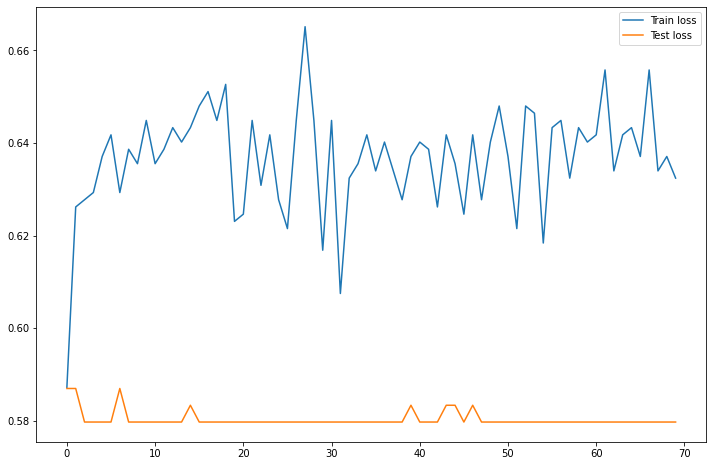

In [56]:
models_results[-1] = neural_net_results(heart_AGE,heart_df['HeartDisease'])

# Model 6 (Increase of epochs,Increase of batch)

In [58]:
test66 = pd.DataFrame(Heart_df_clean[['AGE','CHOLESTEROL','MAXHR','RESTINGBP']])

In [59]:
def neural_net_results6(X, y):

    y = keras.utils.to_categorical(y, 2)

    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3,
                                                      random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=30, epochs=100,
              validation_data=(X_val, y_val),
              verbose=1)

    score = np.round(model.evaluate(X_val, y_val, verbose=0)[1], 3)
    print(f'Neural Network score    ========>>> {score}')
    history_plot6(history)
    return score
def history_plot6(history):

    f12 = plt.figure(figsize=(12, 8))
    plt.plot(history.history['accuracy'], label="Train loss")
    plt.plot(history.history['val_accuracy'], label="Test loss")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)
    
models_results = np.zeros(4)


Epoch 1/100
22/22 [==============================] - 1s 15ms/step - loss: 0.7535 - accuracy: 0.4626 - val_loss: 0.6637 - val_accuracy: 0.6413
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5545 - val_loss: 0.6132 - val_accuracy: 0.6775
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6530 - accuracy: 0.6137 - val_loss: 0.5927 - val_accuracy: 0.6848
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6086 - accuracy: 0.6667 - val_loss: 0.5807 - val_accuracy: 0.6884
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.6682 - val_loss: 0.5721 - val_accuracy: 0.6848
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6016 - accuracy: 0.6822 - val_loss: 0.5681 - val_accuracy: 0.6848
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6112 - accuracy: 0.6822 - val_loss: 0.5647 - val_accuracy: 0.6957
Epoch 8/100


Epoch 59/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5709 - accuracy: 0.7243 - val_loss: 0.5504 - val_accuracy: 0.7210
Epoch 60/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7212 - val_loss: 0.5489 - val_accuracy: 0.7246
Epoch 61/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5612 - accuracy: 0.7181 - val_loss: 0.5498 - val_accuracy: 0.7246
Epoch 62/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.7321 - val_loss: 0.5510 - val_accuracy: 0.7210
Epoch 63/100
22/22 [==============================] - 0s 4ms/step - loss: 0.5722 - accuracy: 0.7274 - val_loss: 0.5490 - val_accuracy: 0.7246
Epoch 64/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5604 - accuracy: 0.7305 - val_loss: 0.5480 - val_accuracy: 0.7246
Epoch 65/100
22/22 [==============================] - 0s 5ms/step - loss: 0.5668 - accuracy: 0.7243 - val_loss: 0.5458 - val_accuracy: 0.7355
Epoch 

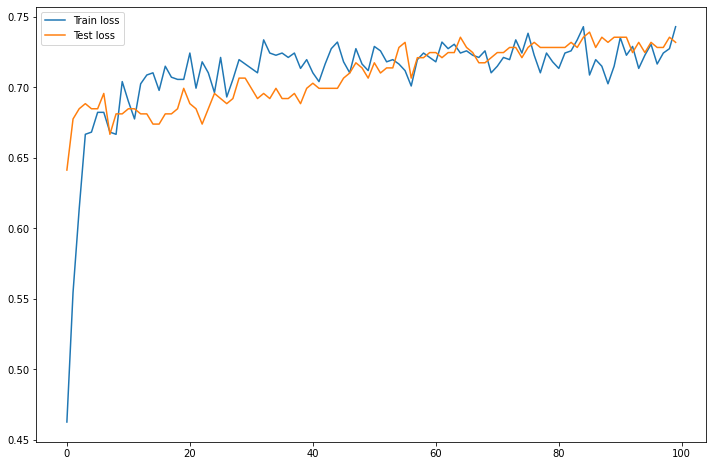

In [60]:
models_results[-1] = neural_net_results6(test66,heart_df['HeartDisease'])